<a href="https://colab.research.google.com/github/JorgeVitor30/API_Store_Registration/blob/main/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
base_census = pd.read_csv("/content/census.csv")
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8525,50,Self-emp-not-inc,57758,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
8526,29,Private,207064,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
8527,23,Private,193090,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,3674,0,40,United-States,<=50K
8528,64,Private,151364,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [ ]:
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,8530.000000,8.530000e+03,8530.000000,8530.000000,8530.000000,8530.000000
mean,38.462251,1.904382e+05,10.072567,1054.440094,89.633529,40.509144
std,13.580418,1.064519e+05,2.545174,7269.361920,403.858449,12.271290
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179112e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786295e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.387355e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,3004.000000,99.000000


In [ ]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

#Visualização dos dados


In [ ]:
np.unique(base_census['income'], return_counts = True)      #saber os tipos que tem de income (nosso classe de valor final a ser calculado)

(array([' <=50K', ' >5', ' >50K'], dtype=object), array([6495,    1, 2034]))

In [ ]:
np.unique(base_census['race'], return_counts=True)

(array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
        ' White'], dtype=object),
 array([  86,  258,  832,   62, 7292]))

<Axes: xlabel='income', ylabel='count'>

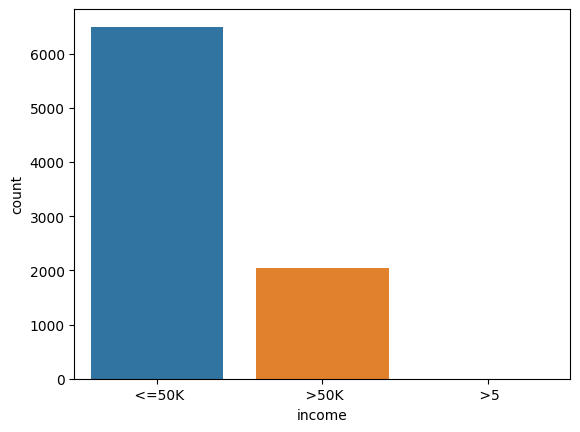

In [ ]:
sns.countplot(x = base_census["income"])      # PODE SER CONSIDERADO DESBALANCEADA POIS TENDE MAIS PARA UM LADO DE UMA CLASSE

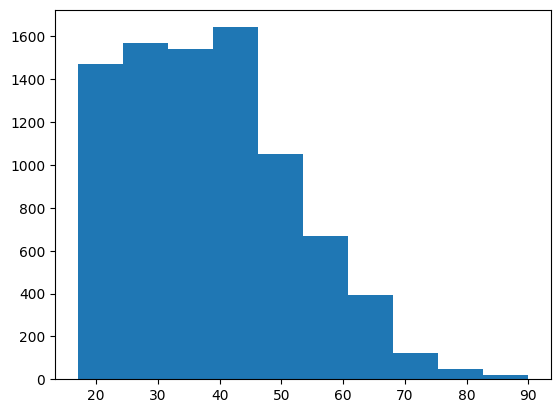

In [ ]:
plt.hist(x = base_census["age"]);

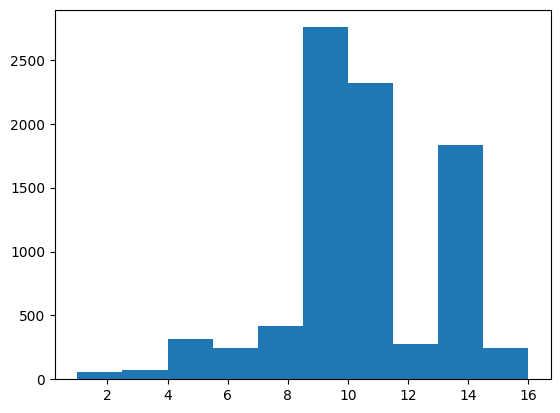

In [ ]:
plt.hist(x = base_census["education-num"]);

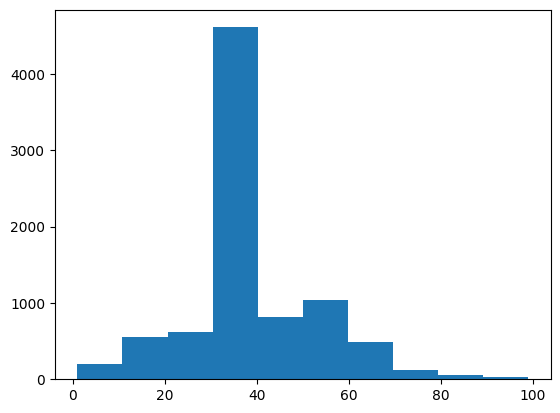

In [ ]:
plt.hist(x = base_census["hour-per-week"]);

#Gráficos Dinâmicos

In [ ]:
grafico = px.treemap(base_census, path = ["workclass", "age"])    # PODEMOS AGRUPAR ALGUNS ATRIBUTOS PARA MELHORAR A VISUALIZAÇÃO
grafico.show()

In [ ]:
grafico = px.treemap(base_census, path = ["occupation", "relationship", "age", "race"]) 
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['workclass','occupation', 'income'])
grafico.show()

In [ ]:
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

#Divisão de previsores e classe

In [ ]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [23, ' Private', 193090, ..., 0, 40, ' United-States'],
       [64, ' Private', 151364, ..., 0, 40, ' United-States'],
       [70, ' Local-gov', 88638, ..., 0, 50, ' United-States']],
      dtype=object)

In [ ]:
Y_census = base_census.iloc[:,14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >5'],
      dtype=object)

#Tratamento de atributos categóricos

###LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_teste = LabelEncoder()

In [ ]:
teste = label_encoder_teste.fit_transform(X_census[:,1])

In [ ]:
X_census[:,1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Local-gov'], dtype=object)

In [ ]:
teste

array([7, 6, 4, ..., 4, 4, 2])

In [ ]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
# FAZER UMA LABEL PARA CADA ATRIBUTO STRING PARA A TRANSFORMAÇÃO EM NÚMERO
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_county = LabelEncoder()



In [ ]:
X_census[:, 1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:, 3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:, 5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:, 6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:, 7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:, 8] = label_encoder_race.fit_transform(X_census[:, 8])
X_census[: , 9] = label_encoder_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = label_encoder_county.fit_transform(X_census[:, 13])

In [ ]:
X_census    # EXISTE SOMENTE DADOS NÚMERICOS

array([[39, 7, 77516, ..., 0, 40, 37],
       [50, 6, 83311, ..., 0, 13, 37],
       [38, 4, 215646, ..., 0, 40, 37],
       ...,
       [23, 4, 193090, ..., 0, 40, 37],
       [64, 4, 151364, ..., 0, 40, 37],
       [70, 2, 88638, ..., 0, 50, 37]], dtype=object)

# OneHotEncoder

In [ ]:
np.unique(base_census["workclass"])
len(np.unique(base_census["workclass"]))

9

In [ ]:
np.unique(base_census["occupation"])

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
onehotencoder_census = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder = 'passthrough')   # ESSE ULTIMO ARGUMENTO FAZ COM QUE N APAGUE OS ATRIBUTOS EXISTENTES

In [ ]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
X_census.shape    #COLUNAS , LINHAS

(8530, 106)

#Escalonamento dos valores

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
X_census[0]

array([-0.25085523, -0.16831613, -0.25919835, -0.01082807, -1.51273188,
       -0.19191131, -0.2943199 ,  4.96918213, -0.01082807, -0.1719637 ,
       -0.19710485, -0.10612538, -0.06863982, -0.09226403, -0.14430302,
       -0.12823507, -0.18422647, -0.20930391,  2.27130904, -0.10891463,
       -0.69069261, -0.23571684, -0.04197139, -0.13150203, -0.54619202,
       -0.40127061, -0.02865846, -0.91345969, -0.11482362,  1.42070425,
       -0.18320358, -0.17232469, -0.25111913,  2.71192816, -0.0153141 ,
       -0.37058512, -0.37201591, -0.1719637 , -0.20060883, -0.25687254,
       -0.33679618, -0.06418778, -0.38013888, -0.14087925, -0.36565759,
       -0.17340367, -0.23012263, -0.81390661,  1.69729218, -0.17518891,
       -0.43323371, -0.34323307, -0.23096862, -0.10091951, -0.17660565,
       -0.32875526, -0.08556683,  0.41203774, -0.70331763,  0.70331763,
       -0.1386999 , -0.02865846, -0.07034317, -0.05311815, -0.03249945,
       -0.05311815, -0.04598545, -0.02653102, -0.05085078, -0.05

#Divisão das bases em treinamento e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_census_treinamento, X_census_teste, Y_census_treinamento, Y_census_teste = train_test_split(X_census, Y_census, test_size = 0.15, random_state = 0)    ## ESSE TEST_SIZE SIGNIFICA (ESTOU USANDO APENAS 15% DOS DADOOS PARA TESTAR E O RESTANTE 85% PARA TREINAR O ALGORITMO)

In [ ]:
X_census_treinamento.shape, Y_census_treinamento.shape

((7250, 106), (7250,))

In [ ]:
X_census_teste.shape, Y_census_teste.shape    # DADOS PARA TESTAR O ALGORITMO

((1280, 106), (1280,))

#Salvar as variáveis

In [ ]:
import pickle

In [ ]:
with open('credit.pkl', mode = 'wb') as f:
  pickle.dump([])